In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [3]:
df = pd.read_csv(r"C:\Users\Jayditya\Downloads\DSBDA LAB\Lab\Experiments\Datasets\456Social_Network_Ads.csv")
print(df.head())
print(df.shape)

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
(400, 5)


In [5]:
print(df.columns)
df.drop(['User ID'], axis=1, inplace=True)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [7]:
print("Missing Values:",df.isnull().sum())

Missing Values: Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


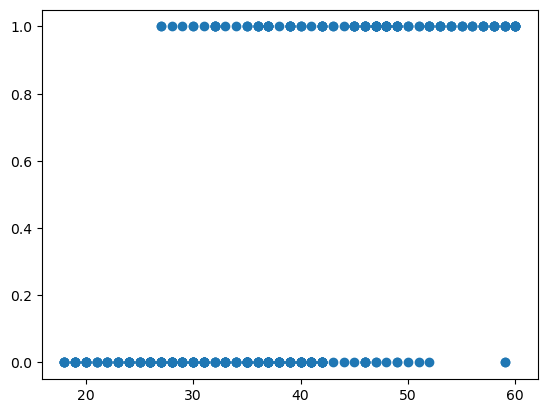

In [11]:
# Visualizing the dataset
plt.scatter(df['Age'], df['Purchased'])
plt.show()

In [13]:
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]
for col in ['Age', 'EstimatedSalary']:
    df = remove_outliers(df, col)

print("After Outlier Removal:", df.shape)

After Outlier Removal: (400, 4)


In [15]:
sc = StandardScaler()
df[['Age', 'EstimatedSalary']] = sc.fit_transform(df[['Age', 'EstimatedSalary']])

In [17]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f" True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"\n Accuracy      : {accuracy:.2f}")
print(f"Error Rate    : {error_rate:.2f}")
print(f"Precision     : {precision:.2f}")
print(f"Recall        : {recall:.2f}")

Confusion Matrix:
[[65  3]
 [ 8 24]]
 True Positives (TP): 24
True Negatives (TN): 65
False Positives (FP): 3
False Negatives (FN): 8

 Accuracy      : 0.89
Error Rate    : 0.11
Precision     : 0.89
Recall        : 0.75


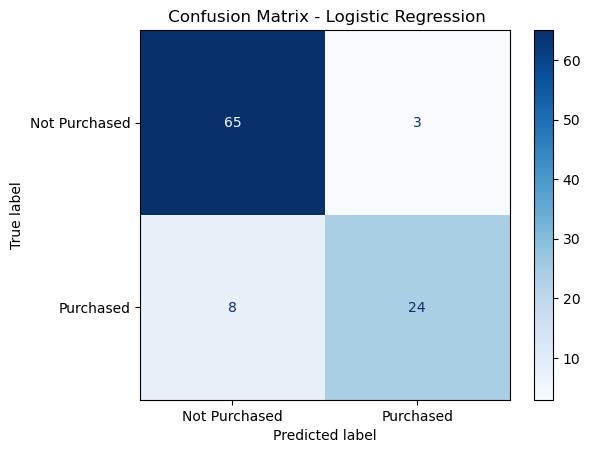

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Purchased', 'Purchased']).plot(cmap='Blues')
plt.title(" Confusion Matrix - Logistic Regression")
plt.show()